## Combining all the results

In [ ]:
import pandas as pd

# Read each CSV file into separate DataFrames

df_1 = pd.read_csv("./all_results/ChatGPT_3.5.csv")
df_2 = pd.read_csv("./all_results/ChatGPT_4-o.csv")
df_3 = pd.read_csv("./all_results/ChatGPT_4.csv")
df_4 = pd.read_csv("./all_results/Meta_Lama_3_70B.csv")
df_5 = pd.read_csv("./all_results/Mistral_Large.csv")
df_6 = pd.read_csv("./all_results/Mistral_small.csv")
df_7 = pd.read_csv("./all_results/Mistral_Next.csv")
df_8 = pd.read_csv("./all_results/Blackbox_ai.csv")

# Concatenate the DataFrames vertically
merged_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], ignore_index=True)

print(merged_df)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read each CSV file into separate DataFrames, setting the first column as the index, labeled as 'Model Name'
df_1 = pd.read_csv("./all_results/ChatGPT_3.5.csv", index_col=0)
df_2 = pd.read_csv("./all_results/ChatGPT_4-o.csv", index_col=0)
df_3 = pd.read_csv("./all_results/ChatGPT_4.csv", index_col=0)
df_4 = pd.read_csv("./all_results/Meta_Lama_3_70B.csv", index_col=0)
df_5 = pd.read_csv("./all_results/Mistral_Large.csv", index_col=0)
df_6 = pd.read_csv("./all_results/Mistral_small.csv", index_col=0)
df_7 = pd.read_csv("./all_results/Mistral_Next.csv", index_col=0)
df_8 = pd.read_csv("./all_results/Blackbox_ai.csv", index_col=0)

# Concatenate the DataFrames vertically
merged_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], ignore_index=False)

merged_df


,Rouge1,RougeL,Bleu,Sentiment,Fact checking,Bert Score,RoberTa
ChatGPT_3.5,0.32,0.20,0.086001,0.9,1.0,0.879172,0.618968
ChatGPT_4-o,0.33,0.21,0.090846,0.9,0.8,0.890361,0.649441
ChatGPT_4,0.27,0.16,0.090277,0.9,0.8,0.879445,0.510433
Meta_Lama_3_70B,0.30,0.20,0.085263,0.9,0.8,0.875584,0.488014
Mistral_Large,0.21,0.15,0.075708,0.8,0.6,0.856638,0.558638
Mistral_small,0.26,0.17,0.077971,0.8,0.7,0.852955,0.535463
Mistral_Next,0.32,0.18,0.080926,0.8,0.8,0.872035,0.623032
Blackbox_ai,0.24,0.19,0.089409,0.9,0.8,0.872544,0.601503


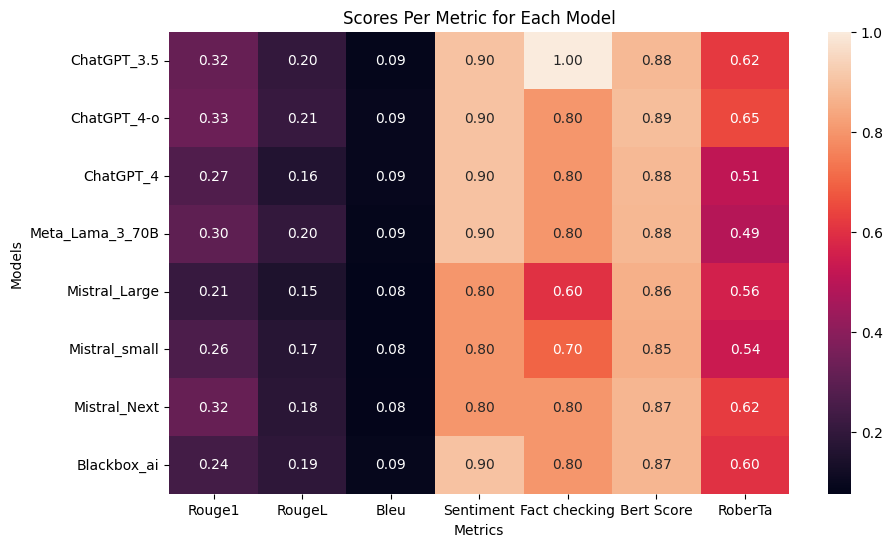

In [9]:
# Remove 'Model Name' row for heatmap
heatmap_data = merged_df.copy()
# heatmap_data.reset_index(drop=True, inplace=True)  # Reset index to remove 'Model Name' from columns

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", vmax=1.0)
plt.title('Scores Per Metric for Each Model')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()

In [8]:
# Calculate and display the maximum scores for each metric
for col in merged_df.columns:
    max_score = merged_df[col].max()
    model_names_with_max_score = merged_df[merged_df[col] == max_score].index.tolist()
    print(f"Best Models for {col}: {model_names_with_max_score}, Score: {max_score}")

print(30*'-'    )
# Identify and display models with the worst scores for each metric
for col in merged_df.columns:
    min_score = merged_df[col].min()
    model_names_with_min_score = merged_df[merged_df[col] == min_score].index.tolist()
    print(f"Worst Models for {col}: {model_names_with_min_score}, Score: {min_score}")


Best Models for Rouge1: ['ChatGPT_4-o'], Score: 0.33
Best Models for RougeL: ['ChatGPT_4-o'], Score: 0.21
Best Models for Bleu: ['ChatGPT_4-o'], Score: 0.0908457435182685
Best Models for Sentiment: ['ChatGPT_3.5', 'ChatGPT_4-o', 'ChatGPT_4', 'Meta_Lama_3_70B', 'Blackbox_ai'], Score: 0.9
Best Models for Fact checking: ['ChatGPT_3.5'], Score: 1.0
Best Models for Bert Score: ['ChatGPT_4-o'], Score: 0.8903605341911316
Best Models for RoberTa: ['ChatGPT_4-o'], Score: 0.6494408249855042
------------------------------
Worst Models for Rouge1: ['Mistral_Large'], Score: 0.21
Worst Models for RougeL: ['Mistral_Large'], Score: 0.15
Worst Models for Bleu: ['Mistral_Large'], Score: 0.0757079094332595
Worst Models for Sentiment: ['Mistral_Large', 'Mistral_small', 'Mistral_Next'], Score: 0.8
Worst Models for Fact checking: ['Mistral_Large'], Score: 0.6
Worst Models for Bert Score: ['Mistral_small'], Score: 0.8529545664787292
Worst Models for RoberTa: ['Meta_Lama_3_70B'], Score: 0.4880135789513588


C:\Users\alexi\AppData\Local\Temp\ipykernel_26236\804083378.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Metric', data=df_best_scores, palette='viridis')


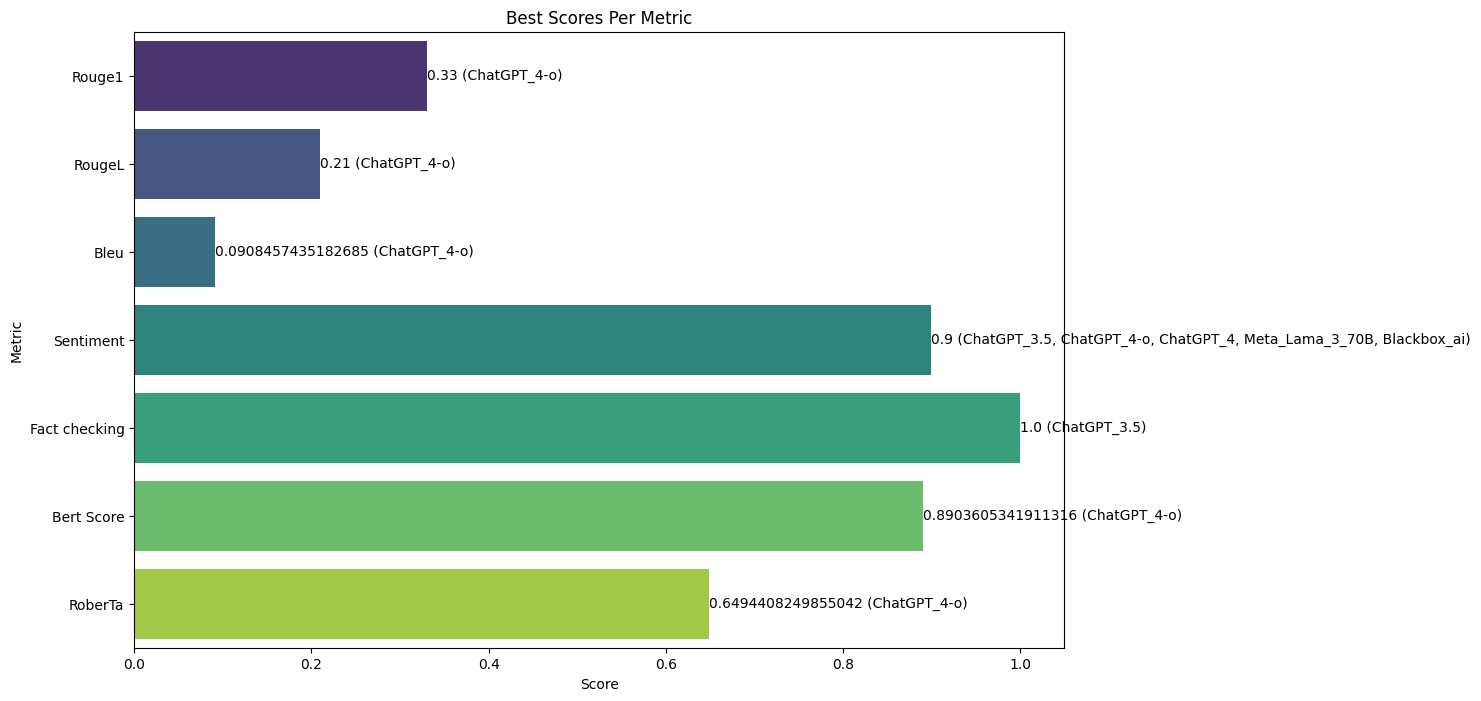

C:\Users\alexi\AppData\Local\Temp\ipykernel_26236\804083378.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Metric', data=df_worst_scores, palette='magma')


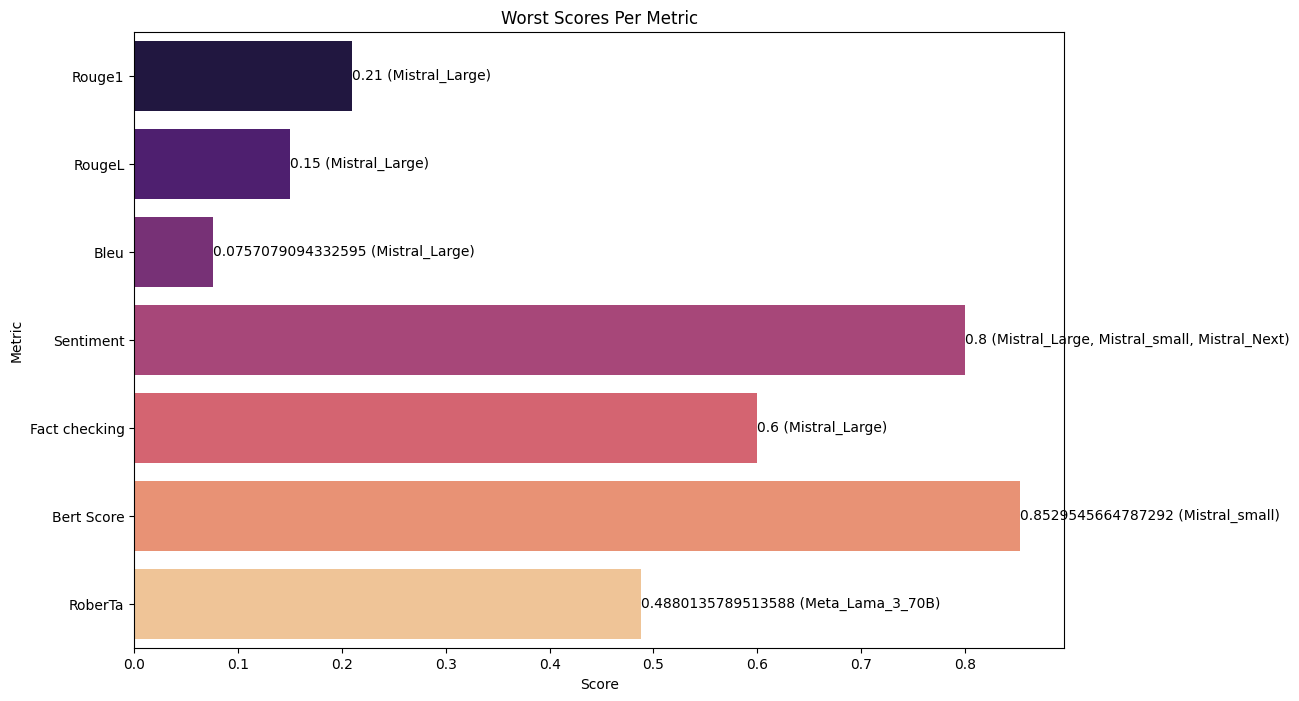

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame and 'Model Name' is the index

# Preparing data for plotting
best_scores = []
worst_scores = []
metrics = []

for col in merged_df.columns:
    max_score = merged_df[col].max()
    min_score = merged_df[col].min()
    model_names_with_max_score = merged_df[merged_df[col] == max_score].index.tolist()
    model_names_with_min_score = merged_df[merged_df[col] == min_score].index.tolist()
    best_scores.append((col, max_score, ', '.join(model_names_with_max_score)))
    worst_scores.append((col, min_score, ', '.join(model_names_with_min_score)))
    metrics.append(col)

# Convert to DataFrame for easier plotting
df_best_scores = pd.DataFrame(best_scores, columns=['Metric', 'Score', 'Models'])
df_worst_scores = pd.DataFrame(worst_scores, columns=['Metric', 'Score', 'Models'])

# Plotting best scores
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Metric', data=df_best_scores, palette='viridis')
plt.title('Best Scores Per Metric')
plt.xlabel('Score')
plt.ylabel('Metric')
for i, (score, models) in enumerate(zip(df_best_scores['Score'], df_best_scores['Models'])):
    plt.text(score, i, f'{score} ({models})', va='center')
plt.show()

# Plotting worst scores
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Metric', data=df_worst_scores, palette='magma')
plt.title('Worst Scores Per Metric')
plt.xlabel('Score')
plt.ylabel('Metric')
for i, (score, models) in enumerate(zip(df_worst_scores['Score'], df_worst_scores['Models'])):
    plt.text(score, i, f'{score} ({models})', va='center')
plt.show()
